In [21]:
%matplotlib inline
from obspy import read_inventory
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# import tempmatch as tm
# from obspy import UTCDateTime as UTC
# from obspy.signal import filter
import obspy
import glob

import scipy.stats as stats

def get_stream(paths):
    stream = obspy.read(paths[0])
    for p in paths[1:]:
        stream = stream + obspy.read(p)       
    stream[3].data = -1 * stream[3].data
    return stream

def get_std(stream, length_step):
    stream_copy = stream.copy()
    dfstd = pd.DataFrame()
    for window in stream_copy.slide(window_length=length_step, step=length_step):
        dfwindow = pd.DataFrame(window.std()).transpose()
        dfwindow.index = (window[0].stats['starttime'],)
        dfstd = pd.concat([dfstd, dfwindow])
    dfstd.columns = ['h0', 'h1', 'h2', 'h3', 'h4', 'h5']
    return dfstd

paths = [
'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.{year}.{day}',
'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.{year}.{day}',
'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.{year}.{day}',
'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.{year}.{day}',
'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.{year}.{day}',
'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.{year}.{day}'
]
day_index = ['138', '140', '221', '222', '272', '274', '342']


In [24]:
datafiles = []


years_days = [d.split('.')[-2:] for d in glob.glob('/media/sda/data/robdata/Hydrophones/DAYS/B00/*')]
years_days = np.array([list(x) for x in set(tuple(x) for x in years_days)])


for y, d in years_days:
    day_dirs = []
    for s in [1,2,3,4,5,6]:
        dir = '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.0{s}.GDH.{y}.{d}'.format(s=s, y=y, d=d)
        day_dirs.append(dir)
    datafiles.append(day_dirs)   
    
datafiles[0:2]

[['/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2020.023',
  '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2020.023',
  '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2020.023',
  '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2020.023',
  '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2020.023',
  '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.2020.023'],
 ['/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.239',
  '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.239',
  '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2019.239',
  '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2019.239',
  '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2019.239',
  '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.2019.239']]

In [ ]:
def get_std_for_one_day(dataloc):
    day = dataloc.split('.')[-1]
    year = dataloc.split('.')[-2]
    stream = get_stream(paths=dataloc)
    stream.filter(freqmin=6.0, freqmax=8.0, type='bandpass')
    std = get_std(s, length_step=60.0)
    std['day'] = day
    std['year'] = year
    std.to_csv('/media/sda/data/robdata/stds/std_{year}_{day}.csv', index=True)
    del day, year, stream, std

In [ ]:
# for dataloc in datafiles:
#     get_std_for_one_day()

In [2]:
streams = []
for day in day_index:
    stream = get_stream(paths=[p.format(day=day, year='2019') for p in paths])
    streams.append(stream)
    
# need to remember the last day
streams.append(get_stream(paths=[p.format(day='010', year='2020') for p in paths]))

In [3]:
streams[0]

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-05-18T00:00:02.907000Z - 2019-05-19T00:00:01.019000Z | 1000.0 Hz, 86398113 samples
7F.B00.02.GDH | 2019-05-18T00:00:01.540000Z - 2019-05-19T00:00:00.847000Z | 1000.0 Hz, 86399308 samples
7F.B00.03.GDH | 2019-05-18T00:00:02.689000Z - 2019-05-19T00:00:03.138000Z | 1000.0 Hz, 86400450 samples
7F.B00.04.GDH | 2019-05-18T00:00:02.341000Z - 2019-05-19T00:00:01.086000Z | 1000.0 Hz, 86398746 samples
7F.B00.05.GDH | 2019-05-18T00:00:02.971000Z - 2019-05-19T00:00:01.291000Z | 1000.0 Hz, 86398321 samples
7F.B00.06.GDH | 2019-05-18T00:00:02.192000Z - 2019-05-19T00:00:01.375000Z | 1000.0 Hz, 86399184 samples

In [4]:
s = streams[0].copy()
s.filter(freqmin=6.0, freqmax=8.0, type='bandpass')

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-05-18T00:00:02.907000Z - 2019-05-19T00:00:01.019000Z | 1000.0 Hz, 86398113 samples
7F.B00.02.GDH | 2019-05-18T00:00:01.540000Z - 2019-05-19T00:00:00.847000Z | 1000.0 Hz, 86399308 samples
7F.B00.03.GDH | 2019-05-18T00:00:02.689000Z - 2019-05-19T00:00:03.138000Z | 1000.0 Hz, 86400450 samples
7F.B00.04.GDH | 2019-05-18T00:00:02.341000Z - 2019-05-19T00:00:01.086000Z | 1000.0 Hz, 86398746 samples
7F.B00.05.GDH | 2019-05-18T00:00:02.971000Z - 2019-05-19T00:00:01.291000Z | 1000.0 Hz, 86398321 samples
7F.B00.06.GDH | 2019-05-18T00:00:02.192000Z - 2019-05-19T00:00:01.375000Z | 1000.0 Hz, 86399184 samples

In [5]:
std = get_std(s, length_step=60.0)

<AxesSubplot:>

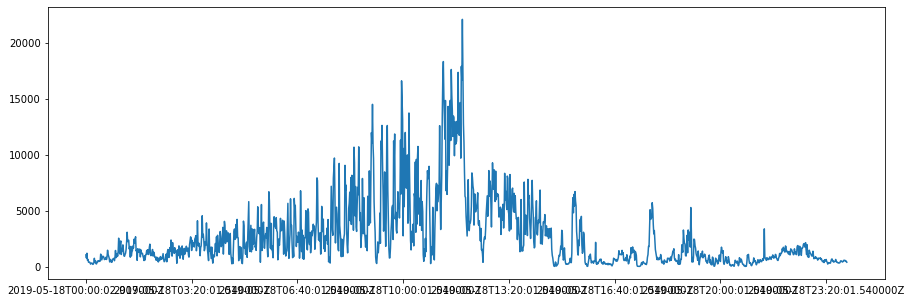

In [16]:
std.sum(axis=1).plot(figsize=(15, 5))

525600